In [1]:
#Importing required libraries

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.precision', 3)

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

pd.options.display.float_format = '{:.3f}'.format



In [2]:
df_train= pd.read_csv("train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [3]:
df_test=pd.read_csv("test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000,0,0,240276,9.688,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.000,0,0,315154,8.662,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1,1,3101298,12.287,NaN,S


In [4]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


In [6]:
round(100*(df_train.isnull().sum()/ len(df_train)),2)

PassengerId    0.000
Survived       0.000
Pclass         0.000
Name           0.000
Sex            0.000
Age           19.870
SibSp          0.000
Parch          0.000
Ticket         0.000
Fare           0.000
Cabin         77.100
Embarked       0.220
dtype: float64

values are missing from columns - Age(19.87%) , Cabin(77.1%) and Embarked (0.22%)

In [7]:
df_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Let's drop the column Cabin since most of the data is missing and there are a lot of values present in the rest of the data so we can't impute with a random value

In [8]:
df_train.drop('Cabin',axis=1,inplace=True)

In [9]:
#Since age may be important, let's impute the missing values with the median
df_train['Age'].fillna(df_train['Age'].median(),inplace=True)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [11]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
#let's drop the 2(0.22%) rows which don't have the value of Embarked.
df_train.dropna(inplace=True)

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [14]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,S


In [15]:
df_train[df_train['PassengerId']==14]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.000,1,5,347082,31.275,S


In [16]:
#Let's drop PassengerId, Name too since it's not useful for analysis
df_train.drop(['PassengerId','Name'],axis=1,inplace=True)

In [17]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.000,1,0,A/5 21171,7.250,S
1,1,1,female,38.000,1,0,PC 17599,71.283,C
2,1,3,female,26.000,0,0,STON/O2. 3101282,7.925,S
3,1,1,female,35.000,1,0,113803,53.100,S
4,0,3,male,35.000,0,0,373450,8.050,S


In [18]:
#We have Sex, Ticket and Embarked as categorical columns . Let's check the unique values in these

In [19]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [20]:
#Let's encode the column Sex by assigning 0 to male and 1 to female
df_train['Sex']=df_train['Sex'].map({'male':0,'female':1})

In [21]:
df_train['Ticket'].nunique()

680

In [22]:
#Since the Ticket column has almost all the values as unique I don't think it's of much use. Let's drop it too
df_train.drop('Ticket',axis=1,inplace=True)

In [23]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [24]:
#Let's encode the column Embarked by assigning: S:0, C:1, Q:2 
df_train['Embarked']=df_train['Embarked'].map({'S':0,'C':1,'Q':2})

In [25]:
df_train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [26]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000,1,0,7.250,0
1,1,1,1,38.000,1,0,71.283,1
2,1,3,1,26.000,0,0,7.925,0
3,1,1,1,35.000,1,0,53.100,0
4,0,3,0,35.000,0,0,8.050,0


In [27]:
df_train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000,889.000,889.000,889.000,889.000,889.000,889.000,889.000
mean,0.382,2.312,0.351,29.315,0.524,0.382,32.097,0.362
std,0.486,0.835,0.478,12.985,1.104,0.807,49.698,0.636
min,0.000,1.000,0.000,0.420,0.000,0.000,0.000,0.000
25%,0.000,2.000,0.000,22.000,0.000,0.000,7.896,0.000
50%,0.000,3.000,0.000,28.000,0.000,0.000,14.454,0.000
75%,1.000,3.000,1.000,35.000,1.000,0.000,31.000,1.000
max,1.000,3.000,1.000,80.000,8.000,6.000,512.329,2.000


In [28]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000,1,0,7.250,0
1,1,1,1,38.000,1,0,71.283,1
2,1,3,1,26.000,0,0,7.925,0
3,1,1,1,35.000,1,0,53.100,0
4,0,3,0,35.000,0,0,8.050,0


In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null int64
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


In [30]:
def barplot(df, col, graph_title):
    df[col].value_counts(normalize=True).plot.bar(title=graph_title) 

    
col_list=['Survived','Pclass','Sex','SibSp','Parch','Embarked']
title_list=['Survived','Pclass','Sex','SibSp','Parch','Embarked']

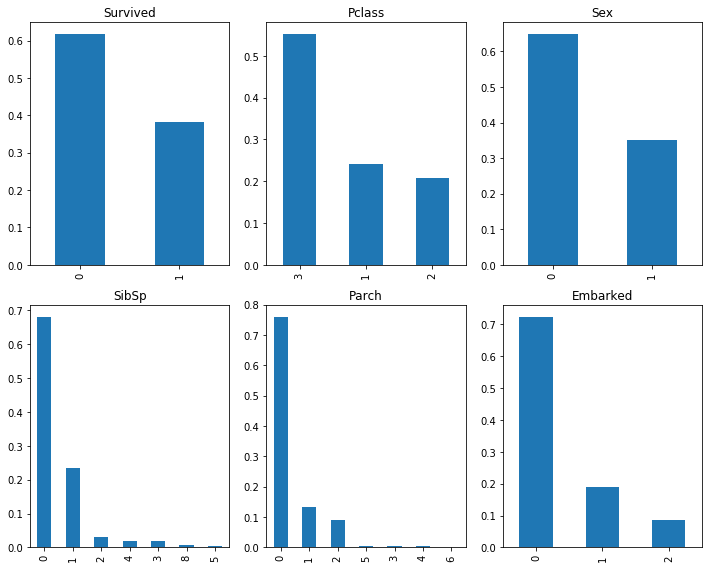

In [31]:
plt.figure(figsize=(10,8))
for i,col,title in zip(np.arange(0,len(col_list)+1),col_list,title_list):
    plt.subplot(2,3,i+1)
    barplot(df_train, col, title)

plt.tight_layout()
plt.show()
    

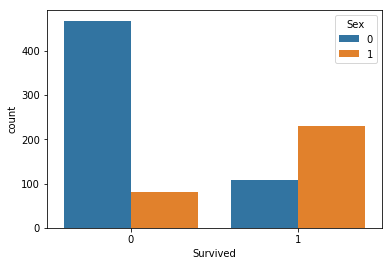

In [32]:
sns.countplot(x='Survived', hue='Sex', data=df_train)

<Figure size 432x288 with 0 Axes>

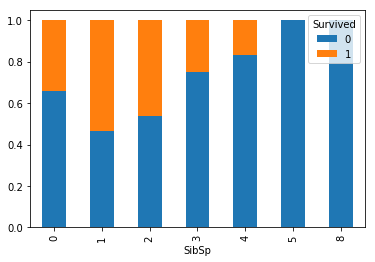

In [33]:
plt.figure()
Siblings=pd.crosstab(df_train['SibSp'],df_train['Survived'])
Siblings.div(Siblings.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

<Figure size 432x288 with 0 Axes>

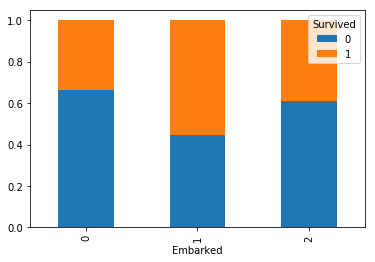

In [34]:
plt.figure()
Embarked=pd.crosstab(df_train['Embarked'],df_train['Survived'])
Embarked.div(Embarked.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

<Figure size 432x288 with 0 Axes>

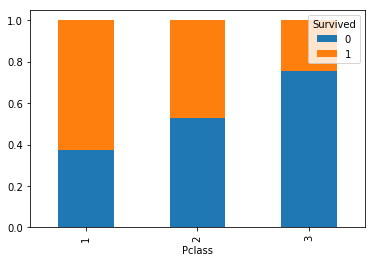

In [35]:
plt.figure()
Class=pd.crosstab(df_train['Pclass'],df_train['Survived'])
Class.div(Class.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

In [36]:
df_train=df_train[df_train['Parch']<3]

In [37]:
df_train=df_train[df_train['SibSp']<5]

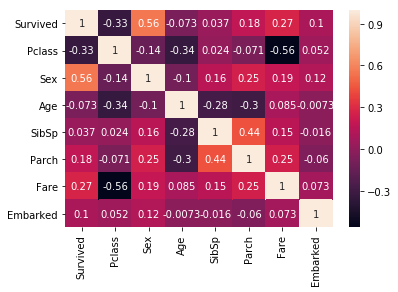

In [38]:
sns.heatmap(df_train.corr(),annot=True)

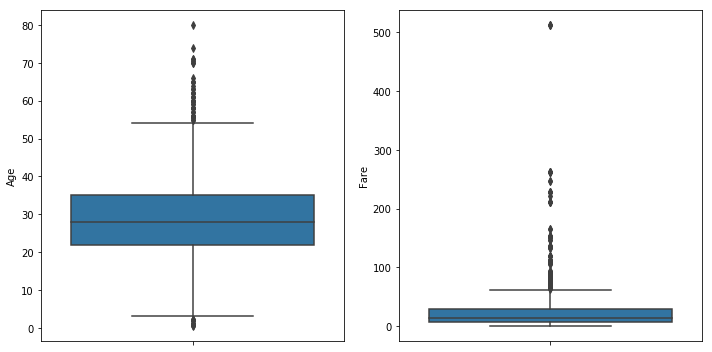

In [39]:
#Column TotalVisits
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y='Age', data=df_train)
plt.subplot(1,2,2)
sns.boxplot(y='Fare', data=df_train)

plt.tight_layout()

In [40]:
df_train['Age'].quantile([.05, 0.5, .90, .95]) 

0.050    6.000
0.500   28.000
0.900   47.000
0.950   54.000
Name: Age, dtype: float64

In [41]:
#Removing data beyod 99.5 percentile
df_train.loc[df_train['Age'] > 54, 'Age'] = 54

In [42]:
df_train['Age'].max()

54.0

In [43]:
df_train['Fare'].quantile([.05, 0.5, .90, .95]) 

0.050     7.225
0.500    13.500
0.900    77.891
0.950   113.155
Name: Fare, dtype: float64

In [44]:

df_train.loc[df_train['Fare'] > 113, 'Fare'] = 113


In [45]:
df_train.shape

(862, 8)

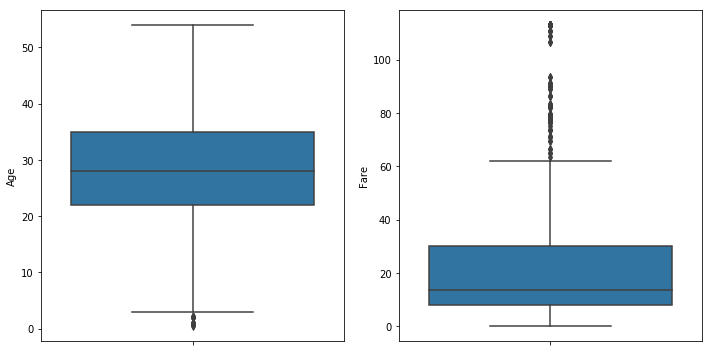

In [46]:
#Column TotalVisits
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y='Age', data=df_train)
plt.subplot(1,2,2)
sns.boxplot(y='Fare', data=df_train)

plt.tight_layout()

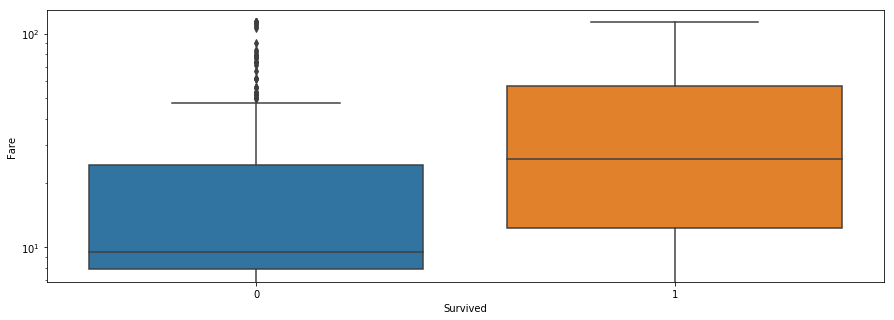

In [47]:
plt.figure(figsize=(15,5))
sns.boxplot(y=df_train['Fare'], x=df_train['Survived'])
plt.ylabel('Fare')
plt.yscale('log')
#plot this for target ==0 and target=1

#### Let's scale the numerical columns - Age and Fare . other numerical columns are more the categorical in nature since we can't manipulate their numbers like Survived, Pclass, SibSp, Parch

In [48]:
df_train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,862.000,862.000,862.000,862.000,862.000,862.000,862.000,862.000
mean,0.390,2.295,0.345,28.902,0.433,0.295,27.065,0.370
std,0.488,0.838,0.475,12.030,0.819,0.605,29.299,0.640
min,0.000,1.000,0.000,0.420,0.000,0.000,0.000,0.000
25%,0.000,2.000,0.000,22.000,0.000,0.000,7.896,0.000
50%,0.000,3.000,0.000,28.000,0.000,0.000,13.500,0.000
75%,1.000,3.000,1.000,35.000,1.000,0.000,30.000,1.000
max,1.000,3.000,1.000,54.000,4.000,2.000,113.000,2.000


## Scaling the variables

In [49]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(df_train[['Age', 'Fare']])
df_train[['Age', 'Fare']] = scale.fit_transform(df_train[['Age', 'Fare']])

In [50]:
df_train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,862.000,862.000,862.000,862.000,862.000,862.000,862.000,862.000
mean,0.390,2.295,0.345,0.000,0.433,0.295,-0.000,0.370
std,0.488,0.838,0.475,1.001,0.819,0.605,1.001,0.640
min,0.000,1.000,0.000,-2.369,0.000,0.000,-0.924,0.000
25%,0.000,2.000,0.000,-0.574,0.000,0.000,-0.655,0.000
50%,0.000,3.000,0.000,-0.075,0.000,0.000,-0.463,0.000
75%,1.000,3.000,1.000,0.507,1.000,0.000,0.100,1.000
max,1.000,3.000,1.000,2.087,4.000,2.000,2.935,2.000


## Modeling

In [51]:
#importing the library
from sklearn.model_selection import train_test_split

In [52]:
y_train=df_train.pop('Survived')
x_train=df_train

In [53]:
#building the model with 8 variables chosen using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 7)             # running RFE with 8  variables as output
rfe = rfe.fit(x_train, y_train)

In [54]:
#List of columns chosen from RFE
col=x_train.columns[rfe.support_]
col

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [55]:
x_train=x_train[col]

In [56]:
#function to mode. takes logistic model instance, dataset and column to drop 
def Logistic_Reg(lm,x_train,colname):
    x_train=x_train.drop(colname,axis=1)
    x_train=sm.add_constant(x_train)
    lm= sm.GLM(y_train,x_train,family = sm.families.Binomial()).fit()
    print(lm.summary())
    return lm,x_train

In [57]:
#function to calculate VIFs
def vif(dataframe):
    dataframe=dataframe.drop(['const'],axis=1)
    vif = pd.DataFrame()
    X = dataframe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [58]:
#Adding the constant to the Data frame 
x_train=sm.add_constant(x_train)

In [59]:
vif(x_train)

   Features   VIF
0    Pclass 2.460
4     Parch 1.790
3     SibSp 1.720
1       Sex 1.680
5      Fare 1.610
6  Embarked 1.410
2       Age 1.190


In [60]:
#building model
lm= sm.GLM(y_train,x_train, family = sm.families.Binomial()).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  862
Model:                            GLM   Df Residuals:                      854
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -384.12
Date:                Mon, 02 Sep 2019   Deviance:                       768.25
Time:                        23:53:28   Pearson chi2:                     888.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7896      0.358      2.205      0.027       0.088       1.491
Pclass        -0.9794      0.168     -5.840      0.000      -1.308      -0.651
Sex            2.6709      0.200     13.340      0.000       2.278       3.063
Age           -0.4623      0.106     -4.360      0.000      -0.670      -0.254
SibSp         -0.3616      0.130     -2.789      0.005      -0.616      -0.107
Parch          0.0661      0.178      0.372      0.710      -0.282       0.414
Fare           0.2033      0.148      1.369      0.171      -0.088       0.494
Embarked       0.2344      0.143      1.636      0.102      -0.046       0.515
==============================================================================
"""

In [61]:
lm,x_train=Logistic_Reg(lm,x_train,'Fare')

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  862
Model:                            GLM   Df Residuals:                      855
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -385.08
Date:                Mon, 02 Sep 2019   Deviance:                       770.15
Time:                        23:53:29   Pearson chi2:                     893.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0794      0.288      3.742      0.000       0.514       1.645
Pclass        -1.1373      0.124     -9.206      0.0

In [62]:
lm,x_train=Logistic_Reg(lm,x_train,'Parch')

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  862
Model:                            GLM   Df Residuals:                      856
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -385.38
Date:                Mon, 02 Sep 2019   Deviance:                       770.77
Time:                        23:53:29   Pearson chi2:                     888.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1291      0.281      4.014      0.000       0.578       1.680
Pclass        -1.1514      0.122     -9.416      0.0

In [63]:
lm,x_train=Logistic_Reg(lm,x_train,'Embarked')

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  862
Model:                            GLM   Df Residuals:                      857
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -387.18
Date:                Mon, 02 Sep 2019   Deviance:                       774.35
Time:                        23:53:29   Pearson chi2:                     887.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1802      0.279      4.223      0.000       0.632       1.728
Pclass        -1.1321      0.121     -9.334      0.0

In [64]:
vif(x_train)

  Features   VIF
0   Pclass 1.500
1      Sex 1.420
3    SibSp 1.370
2      Age 1.070


In [65]:
#predicting the value of conversion using model
y_train_pred = lm.predict(x_train)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09575799, 0.89392262, 0.65621347, 0.90469163, 0.07885562,
       0.10153626, 0.27935045, 0.11325907, 0.64720817, 0.87561965])

In [66]:
#converting to DF
y_train_pred_final = pd.DataFrame({'Survived':y_train.values, 'Survived_prob':y_train_pred})
y_train_pred_final.head()

,Survived,Survived_prob
0,0,0.096
1,1,0.894
2,1,0.656
3,1,0.905
4,0,0.079


In [67]:
#predicting the Conversion based on 0.5 probability

y_train_pred_final['predicted'] = y_train_pred_final.Survived_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Survived,Survived_prob,predicted
0,0,0.096,0
1,1,0.894,1
2,1,0.656,1
3,1,0.905,1
4,0,0.079,0


In [68]:
#importing library
from sklearn import metrics

In [69]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.predicted))

0.7830626450116009


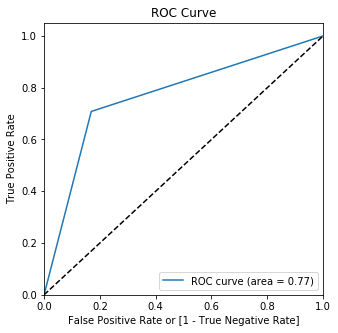

In [70]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Survived, y_train_pred_final.predicted)

In [71]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/20 for x in range(20)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Survived_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Survived,Survived_prob,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0,0,0.096,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.894,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
2,1,0.656,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0
3,1,0.905,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
4,0,0.079,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.35,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

       prob  accuracy  sensi  speci
0.000 0.000     0.390  1.000  0.000
0.100 0.100     0.508  0.946  0.228
0.200 0.200     0.710  0.854  0.618
0.350 0.350     0.788  0.801  0.779
0.400 0.400     0.788  0.774  0.797
0.500 0.500     0.783  0.708  0.831
0.600 0.600     0.809  0.643  0.914
0.700 0.700     0.789  0.506  0.970
0.800 0.800     0.762  0.411  0.987
0.900 0.900     0.687  0.202  0.996


#### Approx cutoff 0.35

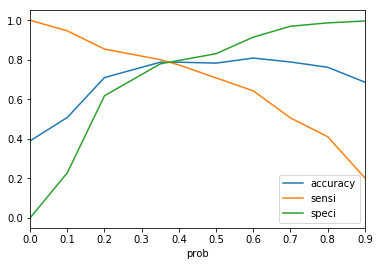

In [73]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [74]:
#importing library
from sklearn.metrics import precision_recall_curve

In [75]:
#getting precision, recall and threshhold values 
p, r, thresholds = precision_recall_curve(y_train_pred_final.Survived, y_train_pred_final.Survived_prob)

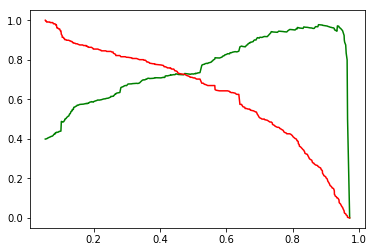

In [76]:
#precision - recall curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [77]:
#At probabilty 0.35 accuracy, sensitivity and specificity are equal. we are considering this point for our model 
y_train_pred_final['final_predicted'] = y_train_pred_final.Survived_prob.map( lambda x: 1 if x > 0.6 else 0)

y_train_pred_final.head()

,Survived,Survived_prob,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
0,0,0.096,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.894,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.656,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1
3,1,0.905,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.079,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
y_train_pred_final.head(25)

,Survived,Survived_prob,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
0,0,0.096,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.894,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.656,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1
3,1,0.905,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.079,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0.102,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0.279,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0.113,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0.647,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1
9,1,0.876,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1


In [79]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.final_predicted)

0.808584686774942

In [80]:
#confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.final_predicted )
confusion

array([[481,  45],
       [120, 216]], dtype=int64)

In [81]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [82]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6428571428571429

In [83]:

precision=TP / float(TP+FP)

In [84]:
# Let us calculate specificity
TN / float(TN+FP)

0.9144486692015209

In [85]:
recall=TP/ float(TP+FN)

In [86]:
F1 = 2 * (precision * recall) / (precision + recall)

In [87]:
F1

0.7236180904522613

## Evaluation on test dataset

In [88]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000,0,0,240276,9.688,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.000,0,0,315154,8.662,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1,1,3101298,12.287,NaN,S


In [89]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [90]:
#Since age may be important, let's impute the missing values with the median
df_test['Age'].fillna(df_test['Age'].median(),inplace=True)

In [91]:
df_test['Age'].quantile([.05, 0.5, .90, .95]) 

0.050   10.000
0.500   27.000
0.900   48.000
0.950   55.000
Name: Age, dtype: float64

In [92]:
#Removing data beyod 99.5 percentile
df_test.loc[df_test['Age'] > 55, 'Age'] = 55

In [93]:
df_test['Fare'].fillna(df_test['Fare'].median(),inplace=True)

In [94]:
df_test.loc[df_test['SibSp'] > 5, 'SipSp'] = 5

In [95]:
passengerID=df_test['PassengerId']

In [96]:
df_test['Age'].describe()

count   418.000
mean     29.292
std      11.946
min       0.170
25%      23.000
50%      27.000
75%      35.750
max      55.000
Name: Age, dtype: float64

In [97]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,SipSp
count,418.000,418.000,418.000,418.000,418.000,418.000,2.000
mean,1100.500,2.266,29.292,0.447,0.392,35.577,5.000
std,120.810,0.842,11.946,0.897,0.981,55.850,0.000
min,892.000,1.000,0.170,0.000,0.000,0.000,5.000
25%,996.250,1.000,23.000,0.000,0.000,7.896,5.000
50%,1100.500,3.000,27.000,0.000,0.000,14.454,5.000
75%,1204.750,3.000,35.750,1.000,0.000,31.472,5.000
max,1309.000,3.000,55.000,8.000,9.000,512.329,5.000


In [98]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
SipSp          2 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 39.3+ KB


In [99]:
x_train.columns

Index(['const', 'Pclass', 'Sex', 'Age', 'SibSp'], dtype='object')

In [100]:
#Let's encode the column Sex by assigning 0 to male and 1 to female
df_test['Sex']=df_test['Sex'].map({'male':0,'female':1})

In [101]:
#Let's encode the column Embarked by assigning: S:0, C:1, Q:2 
df_test['Embarked']=df_test['Embarked'].map({'S':0,'C':1,'Q':2})

In [102]:
df_test[['Age','Fare']]=pd.DataFrame(scale.transform(df_test[['Age','Fare']]))

In [103]:
df_test=df_test[['Pclass', 'Sex', 'Age', 'SibSp']]

In [104]:
#Adding the constant to the Data frame 
df_test=sm.add_constant(df_test)

In [105]:
#predicting the value of conversion using model
y_test_pred = lm.predict(df_test)
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.08030867, 0.37994696, 0.10722226, 0.10521336, 0.62295548,
       0.16454193, 0.61957945, 0.21893182, 0.72389567, 0.07525382])

In [106]:
np.isnan(y_test_pred).sum()

0

In [107]:
# Converting y_pred to a dataframe which is an array
y_test_pred_final = pd.DataFrame(y_test_pred)
y_test_pred_final.head()

,0
0,0.080
1,0.380
2,0.107
3,0.105
4,0.623


In [108]:
y_test_pred_final.columns

RangeIndex(start=0, stop=1, step=1)

In [109]:
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [110]:
#predicting the Conversion based on 0.5 probability

y_test_pred_final['predicted'] = y_test_pred_final.Converted_prob.map(lambda x: 1 if x > 0.6 else 0)
y_test_pred_final['passengerId']= passengerID 


In [111]:
# Let's see the head
y_test_pred_final.head()

,Converted_prob,predicted,passengerId
0,0.080,0,892
1,0.380,0,893
2,0.107,0,894
3,0.105,0,895
4,0.623,1,896


In [112]:
y_test_pred_final

,Converted_prob,predicted,passengerId
0,0.080,0,892
1,0.380,0,893
2,0.107,0,894
3,0.105,0,895
4,0.623,1,896
5,0.165,0,897
6,0.620,1,898
7,0.219,0,899
8,0.724,1,900
9,0.075,0,901


## Final results

In [113]:
submission = pd.DataFrame({
        "PassengerId": y_test_pred_final["passengerId"],
        "Survived": y_test_pred_final['predicted']
    })
submission.to_csv('submission.csv', index=False)